<a href="https://colab.research.google.com/github/kothapallypavithra/2095_DataAnalysis/blob/main/2203A52095_DAUP_LAB5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Load dataset
df = pd.read_csv("/content/Bank-Customer-Attrition-Insights-Data.csv")  # Adjust filename if needed

# Display first few rows
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15598695,Fields,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15671610,Hooper,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


2. Summary Statistics for Key Numerical Variables

In [15]:
# Selecting key numerical columns
numerical_cols = ['CreditScore', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Tenure', 'Age', 'Point Earned']

# Compute summary statistics
summary_stats = df[numerical_cols].agg(['mean', 'median', 'std'])

# Compute skewness and kurtosis separately
summary_stats.loc['skew'] = df[numerical_cols].apply(skew)
summary_stats.loc['kurtosis'] = df[numerical_cols].apply(kurtosis)

print(summary_stats)


          CreditScore       Balance  NumOfProducts  EstimatedSalary    Tenure  \
mean       650.528800  76485.889288       1.530200    100090.239881  5.012800   
median     652.000000  97198.540000       1.000000    100193.915000  5.000000   
std         96.653299  62397.405202       0.581654     57510.492818  2.892174   
skew        -0.071596     -0.141088       0.745456         0.002085  0.010990   
kurtosis    -0.426113     -1.489267       0.582089        -1.181528 -1.165243   

                Age  Point Earned  
mean      38.921800    606.515100  
median    37.000000    605.000000  
std       10.487806    225.924839  
skew       1.011169      0.008343  
kurtosis   1.394050     -1.193784  


3. Distribution of Customers by Gender, Geography, and Age

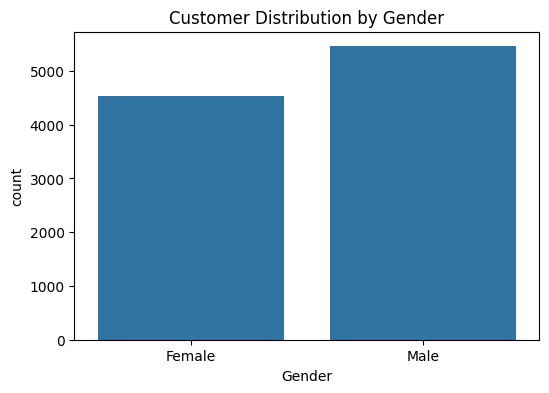

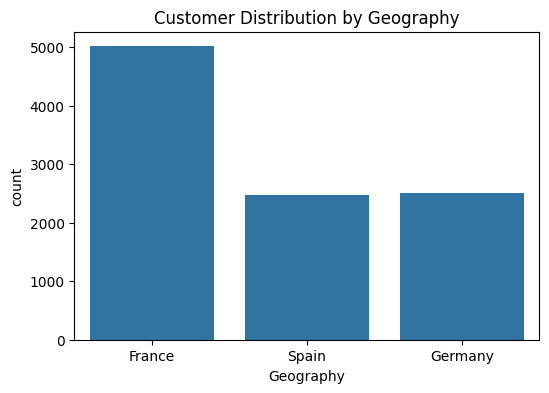

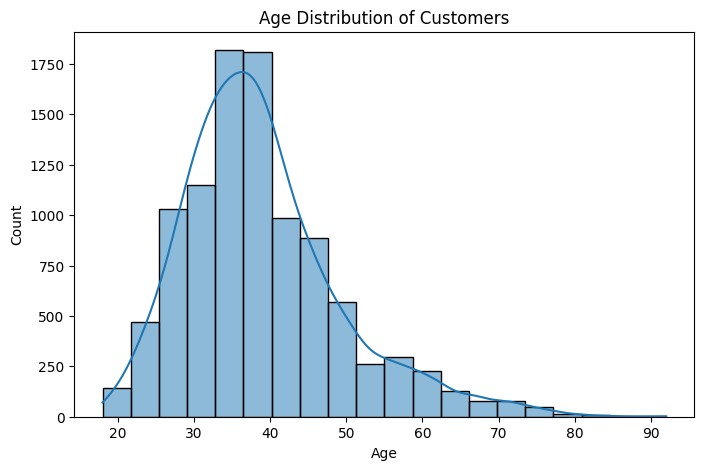

In [16]:
# Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['Gender'])
plt.title("Customer Distribution by Gender")
plt.show()

# Geography distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['Geography'])
plt.title("Customer Distribution by Geography")
plt.show()

# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution of Customers")
plt.show()


4. Transaction Count Analysis for Active vs. Inactive Customers

In [17]:
# Grouping by activity status
active = df[df['IsActiveMember'] == 1]['NumOfProducts']
inactive = df[df['IsActiveMember'] == 0]['NumOfProducts']

# Min, Max, and Average
active_summary = active.agg(['min', 'max', 'mean'])
inactive_summary = inactive.agg(['min', 'max', 'mean'])

print("Active Customers Transaction Summary:\n", active_summary)
print("\nInactive Customers Transaction Summary:\n", inactive_summary)


Active Customers Transaction Summary:
 min     1.000000
max     4.000000
mean    1.535624
Name: NumOfProducts, dtype: float64

Inactive Customers Transaction Summary:
 min     1.000000
max     4.000000
mean    1.524438
Name: NumOfProducts, dtype: float64


5. Relationship Between Credit Score, Balance, and Transaction Count

               CreditScore   Balance  NumOfProducts  Point Earned
CreditScore       1.000000  0.006268       0.012238      0.000077
Balance           0.006268  1.000000      -0.304180      0.014608
NumOfProducts     0.012238 -0.304180       1.000000     -0.015330
Point Earned      0.000077  0.014608      -0.015330      1.000000


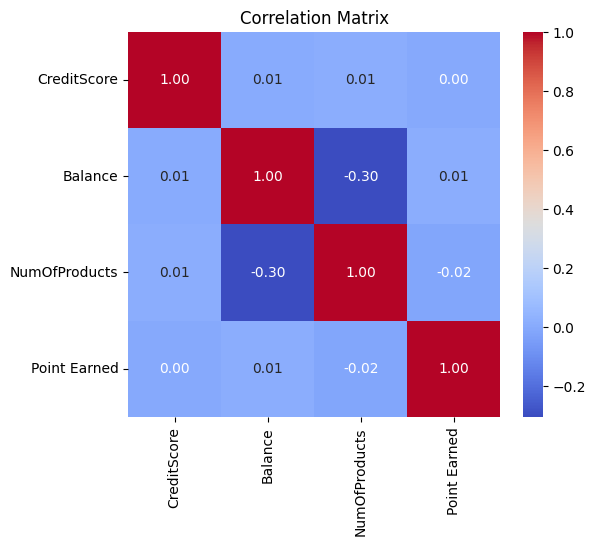

In [18]:
# Correlation matrix
correlation_matrix = df[['CreditScore', 'Balance', 'NumOfProducts', 'Point Earned']].corr()
print(correlation_matrix)

# Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


6. Differences in Balance & Transactions for Churned vs. Retained Customers

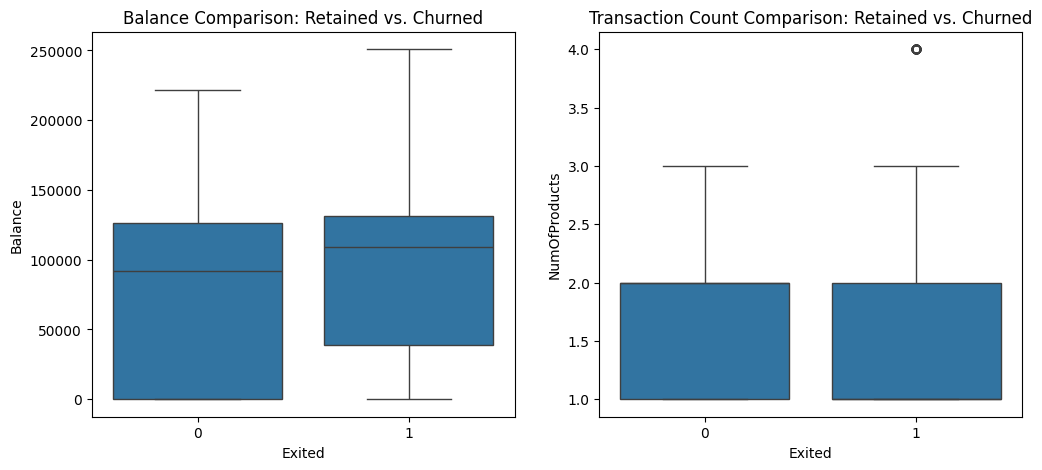

In [19]:
# Boxplots for balance and transactions
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title("Balance Comparison: Retained vs. Churned")

plt.subplot(1,2,2)
sns.boxplot(x='Exited', y='NumOfProducts', data=df)
plt.title("Transaction Count Comparison: Retained vs. Churned")

plt.show()


7. Probability of Low Credit Score & High Balance

In [20]:
# Conditions
low_credit = df['CreditScore'] < 600
high_balance = df['Balance'] > 100000

# Probability
probability = (low_credit & high_balance).mean()
print(f"Probability of having both low credit score and high balance: {probability:.4f}")


Probability of having both low credit score and high balance: 0.1452
